In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sp
from scipy.integrate import trapezoid,simpson,quad
from tqdm import tqdm

# Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de Kirchhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

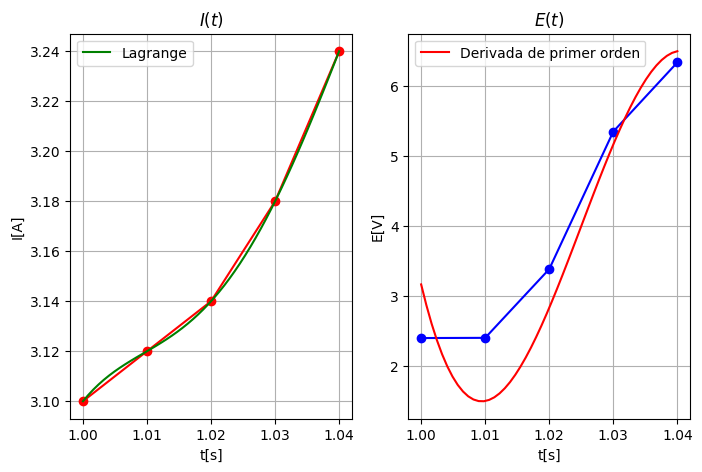

In [10]:
t=np.array([1.00,1.01,1.02,1.03,1.04])
i=np.array([3.10,3.12,3.14,3.18,3.24])

data={'tiempo[s]':t,'corriente[A]':i}

df=pd.DataFrame(data)

derivada=np.gradient(i,t)
di=np.diff(i)
dt=np.diff(t)
d=di/dt
d,derivada

L=0.98
R=0.142
e_t=L*derivada+R*i

df['fem[V]']=e_t

fig,axes=plt.subplots(1,2,figsize=(8,5))

axes[0].plot(df['tiempo[s]'],df['corriente[A]'],'ro-')
axes[0].set_title('$I(t)$')
axes[0].set_ylabel('I[A]')
axes[0].set_xlabel('t[s]')
axes[0].grid()

axes[1].plot(df['tiempo[s]'],df['fem[V]'],'bo-')
axes[1].set_title('$E(t)$')
axes[1].set_ylabel('E[V]')
axes[1].set_xlabel('t[s]')
axes[1].grid()

pol=sc.interpolate.lagrange(t,i)
xl=np.linspace(np.min(t),np.max(t))

axes[0].plot(xl,pol(xl),'g-',label='Lagrange')
axes[0].legend()

H=1e-6
fp=1/(2*H)*(-3*pol(xl)+4*pol(xl+H)-pol(xl+2*H))

axes[1].plot(xl,fp,'r-',label='Derivada de primer orden')
axes[1].legend()


# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

Dados $n$ trapecios por los cuales queremos aproximar el valor de una integral definida se tiene que:

\begin{equation}
\int_{a}^{b}f(x)dx\approx \frac{h}{2}\left[f(a)+f(b)+2\sum_{k=1}^{n-1}f(x_k)\right]
\end{equation}

donde $h=\frac{b-a}{n}$ es el ancho de cada subintervalo y $x_k=a+kh$, es decir que,

\begin{equation}
\sum_{k=1}^{n-1}f(x_k)=f(a+h)+f(a+2h)+...+f(a+(n-2)h)+f(a+(n-1)h)
\end{equation}

Además, el error de este método está determinado por

\begin{equation}
\epsilon=-\frac{(b-a)}{12}h^2f''(\xi)=-\frac{(b-a)^3}{12n^2}f''(\xi)
\end{equation}

2. Escribir en código Markdown la expresión para calcular una integral con la regla de Simpson.

Este método se basa en aproximar la función por polinomios de segundo grado en cada subintervalos.

\begin{equation}
\int_{a}^{b}f(x)dx\approx\frac{h}{3}\left[f(a)+2\sum_{k=1}^{\frac{n}{2}-1}f(x_{2k})+4\sum_{k=1}^{\frac{n}{2}}f(x_{2k-1})+f(b)\right]
\end{equation}

donde aquí $n$ es un número par de subintervalos, $x_k=a+kh$ y $h=\frac{b-a}{n}$. El error de este método viene dado por

\begin{equation}
\epsilon=-\frac{(b-a)}{180}h^4f^{(4)}(\xi)=-\frac{(b-a)^5}{180n^4}f^{(4)}(\xi)
\end{equation}

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

El método de cuadratura de Gauss está definido para una integral de la forma $\int_{-1}^{1}f(x)dx$, pero muchas veces se quiere aproximar una integral en otro intervalo $\int_{a}^{b}f(x)dx$. Para esto, se debe aplicar un cambio de variable lineal que transforme dichos intervalos, de modo que la trasnformación sea biyectiva.

El cambio de variable a realizar es 

\begin{equation}
x=\frac{b-a}{2}z+\frac{b+a}{2}
\end{equation}

donde $x$ es la variable original y $z$ es la variable transformada. De esta manera, se tiene que

\begin{equation}
\int_{a}^{b}f(x)dx=\frac{b-a}{2}\int_{-1}^{1}g(z)dz
\end{equation}

donde $g(z)=f(x(z))$ y $dx=\frac{b-a}{2}dz$.

4. Calcular una aproximación con el método 1,2,3 de las siguientes integrales. Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$
---


In [7]:
#Trapecio

f=lambda x: 1/np.sqrt(np.tan(x))

n=20000000
a=0+1e-10
b=np.pi/2-1e-10         #se suma y resta 1e-10 porque sino la evalución de la función no está definida
h=(b-a)/n

x=np.linspace(a,b,n)

term=f(a)+f(b)
for i in tqdm(range(1,n)):
    term+=f(x[i])

inte=(h/2)*(f(a)+f(b)+2*term)

integral=trapezoid(f(x),x)   #valor real

error=np.abs(inte-integral)
inte,integral,error     #si busco que el error sea menor que 1e-5 me cuesta mucho computacionalmente porque el array x también depende de n
                        #entonces como sc.optimize.trapezoid también depende del array x cada vez cuesta más que se acerquen.

100%|██████████| 19999999/19999999 [03:02<00:00, 109884.94it/s]


(2.232812600902691, 2.2249587305160463, 0.007853870386644868)

In [8]:
#Simpson

g=lambda x: 1/np.sqrt(np.tan(x))

n=20000000
a=0+1e-10
b=np.pi/2-1e-10         #se suma y resta 1e-10 porque sino la evalución de la función no está definida
h=(b-a)/n

x=np.linspace(a,b,n)

sumpar=0
sumimp=0
for i in tqdm(range(1,int(n/2))):
    sumpar+=g(x[2*i])
for j in tqdm(range(1,int(n/2)+1)):
    sumimp+=g(x[2*j-1])

inte=(h/3)*(g(a)+g(b)+2*sumpar+4*sumimp)

integral=simpson(y=g(x),x=x)   #valor real

error=np.abs(inte-integral)
inte,integral,error

100%|██████████| 10000000/10000000 [01:25<00:00, 117236.65it/s]


(2.223706084397506, 2.2237061955867428, 1.1118923692876592e-07)

$$
 \int_{1}^{\infty} \frac{\cos{x}}{x^3} \, dx
 $$
---

In [43]:
x=sp.symbols('x')

f=sp.cos(x)/x**3
inte=sp.integrate(f,(x,1,sp.oo))
inte.evalf()


0.0181176219806057

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\, dydx
 $$
---

In [49]:
N=10000

In [50]:
#Trapecio

f=lambda x,y: 1/np.sqrt(1-y**2)

x=np.linspace(0,np.pi/4,N)
I=np.zeros(N)
for i,x_ in tqdm(enumerate(x)):
    y=np.linspace(0,np.sin(x_),N)
    ii=trapezoid(f(x_,y),y)
    I[i]=ii

II=trapezoid(I,x)
II

0it [00:00, ?it/s]

10000it [00:04, 2141.11it/s]


0.30842513766192337

In [51]:
#Simpson

f=lambda x,y: 1/np.sqrt(1-y**2)

x=np.linspace(0,np.pi/4,N)
I2=np.zeros(N)
for i,x_ in tqdm(enumerate(x)):
    y=np.linspace(0,np.sin(x_),N)
    ii2=simpson(y=f(x_,y),x=y)
    I2[i]=ii2

II2=simpson(y=I2,x=x)
II2

0it [00:00, ?it/s]

10000it [00:11, 908.86it/s]


0.3084251375340424

In [30]:
#Cuadratura



## Parte 3

Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [58]:
Io=12
m=3
b=2
g=9.81

Po=2*np.pi*np.sqrt(Io/(m*g*b))

f=lambda phy,k: 1/np.sqrt(1-k**2*np.sin(phy)) 

def P(Po,theta0,theta):
    k=np.sin(theta0/2)
    I=quad(f,0,np.pi/2,args=(k,))
    P=P=((2*Po)/np.pi)*I[0]
    return P

theta=np.pi/3
theta0=0
P(Po,theta0,theta)

2.837006706885775

## Parte 4

The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_1 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [80]:
f=lambda phy,k: 1/(np.sqrt(1-k**2*np.sin(phy)**2))

m=0.1
I=quad(f,0,np.pi/2,args=(m,))[0]
I

1.574745561517356

In [81]:
m1=1-m
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.00725296
b2 = 0.0288729

aprox=a0+a1*m1+a2*m1-(b0+b1*m1+b2*m1**2)*np.log(m1)+3e-5
aprox

1.5602782034750164

In [82]:
np.abs(I-aprox)

0.014467358042339562

# Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here $K(k)$ is a complete elliptic integral of the first kind and $E(k)$ is a complete
elliptic integral of the second kind. For $a = 1$, $I = 3$, and $\frac{μ_0}{4π} = 1$, compute
and plot

a) $A_φ(r = 1.1, θ)$ vs. $θ$

b) $A_φ(r, θ = π∕3)$ vs. $r$


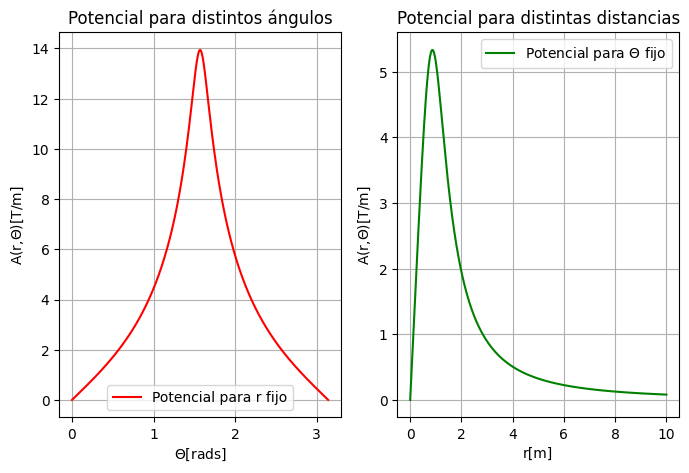

In [22]:
f=lambda phy,k: np.sqrt(1-k**2*np.sin(phy)**2)
g=lambda phy,k: 1/(np.sqrt(1-k**2*np.sin(phy)**2))

@np.vectorize
def A(r,theta,a,i):
    nk_=4*a*r*np.sin(theta)
    dk_=a**2+r**2+2*a*r*np.sin(theta)
    k_=np.sqrt(nk_/dk_)
    
    E=quad(f,0,np.pi/2,args=k_)[0]

    K=quad(g,0,np.pi/2,args=k_)[0]
    
    A=((4*i*a)/(np.sqrt(a**2+r**2+2*a*r*np.sin(theta))))*(((2-k_**2)*K-2*E)/(k_**2))
    return A

t=np.linspace(0.00001,np.pi,1000)
r=np.linspace(0.00001,10,1000)

fig,axes=plt.subplots(1,2,figsize=(8,5))

axes[0].plot(t,A(1.1,t,1,3),'r-',label='Potencial para r fijo')
axes[0].set_title('Potencial para distintos ángulos')
axes[0].set_xlabel('$\Theta$[rads]')
axes[0].set_ylabel('A(r,$\Theta$)[T/m]')
axes[0].grid()
axes[0].legend()

axes[1].plot(r,A(r,np.pi/3,1,3),'g-',label='Potencial para $\Theta$ fijo')
axes[1].set_title('Potencial para distintas distancias')
axes[1].set_xlabel('r[m]')
axes[1].set_ylabel('A(r,$\Theta$)[T/m]')
axes[1].grid()
axes[1].legend()